In [293]:
#1.Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import stats
import copy

In [294]:
#2.Read the data as a data frame
insurance_data = pd.read_csv('insurance (2) (1).csv')

In [295]:
#3.a.Shape of the data

print('Shape of data: \n \n  {}'.format(insurance_data.shape) + '\n \n')
print('Top data: \n \n  {}'.format(insurance_data.head(4)))


Shape of data: 
 
  (1338, 7)
 

Top data: 
 
     age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061


In [296]:
#3.b.Data type of each attribute
#insurance_data.info()
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [297]:
#3.c.Checking the presence of missing values
# option 1  check counts of row having any missing values
print('Missing value rows count is : \n \n{}' .format(insurance_data[insurance_data.isna() == True].count()) + '\n \n') 
# option 2  return rows having any missing values
print('Rows which are having missing values :{}'.format(insurance_data[insurance_data.isna().any(axis=1)])) 


Missing value rows count is : 
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 

Rows which are having missing values :Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


5 point summary :
 
            count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  
AxesSubplot(0.125,0.125;0.775x0.755)


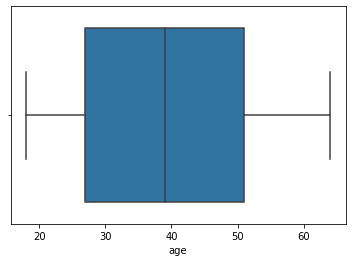

In [298]:
#3.d.5 point summary of numerical attributes
# numerical attriutes  age,bmi,children,charges
#Using describe method get min,max,Q1,Median,Q3
print('5 point summary :\n \n {}'.format(insurance_data.describe().T))
#5 points summary for numeric values
#Age : range from 18 to 64 , mean 39 , Adult population
#Chidren: most of are with children covered  0 ,1 ,2 ,3 , Very few people have more than  children
#Charges : most of the data lies etween 6k to 15k
#Charges are  highly skewed

AxesSubplot(0.125,0.125;0.775x0.755)


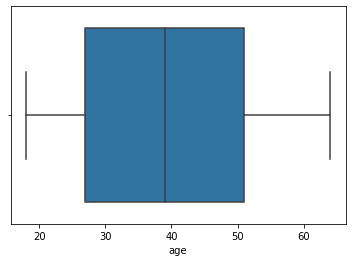

In [299]:
#plot box plot to see point summary of numerical attributes
print (sns.boxplot(insurance_data['age']))

AxesSubplot(0.125,0.125;0.775x0.755)


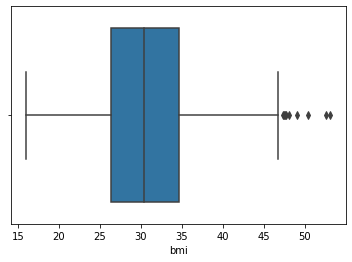

In [300]:
print (sns.boxplot(insurance_data['bmi']))

AxesSubplot(0.125,0.125;0.775x0.755)


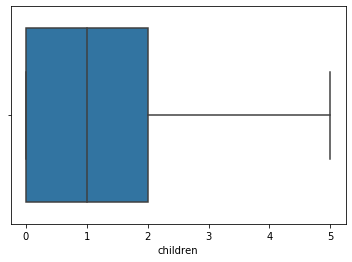

In [301]:
print (sns.boxplot(insurance_data['children']))

AxesSubplot(0.125,0.125;0.775x0.755)


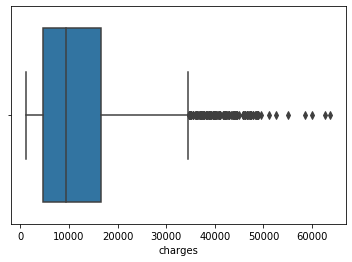

In [302]:
print (sns.boxplot(insurance_data['charges']))

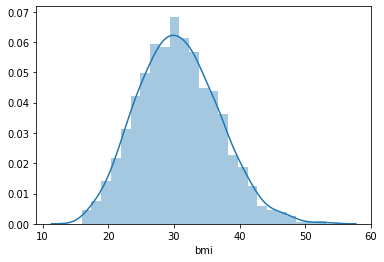

In [303]:
#3.e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
sns.distplot(insurance_data['bmi'])

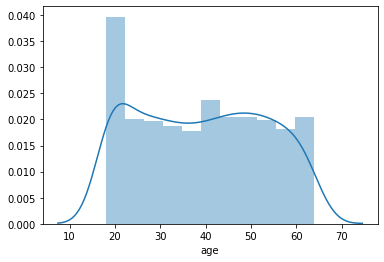

In [304]:
#3.e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
sns.distplot(insurance_data['age'])

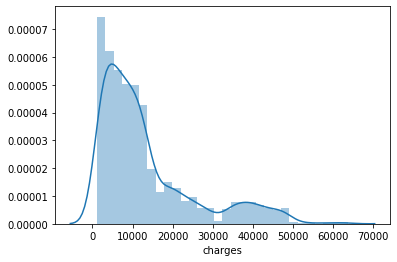

In [225]:
#3.e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
sns.distplot(insurance_data['charges'])

In [305]:
#3.f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
insurance_data.skew()
#charges are highlly skewed

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

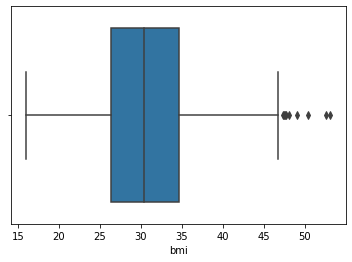

In [306]:
#3.g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
#using the pox plot
sns.boxplot(insurance_data['bmi'])
#outliers prsent : Yes

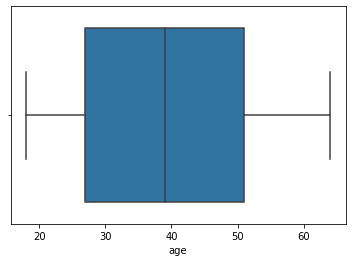

In [307]:
#3.g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
#using the pox plot
sns.boxplot(insurance_data['age'])
#outliers prsent : No

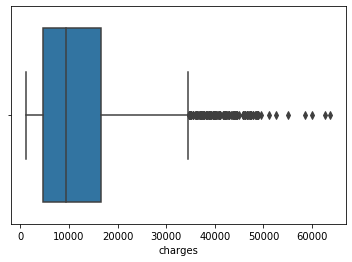

In [308]:
#3.g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns (4 marks)
#using the pox plot
sns.boxplot(insurance_data['charges'])
#outliers prsent : Yes

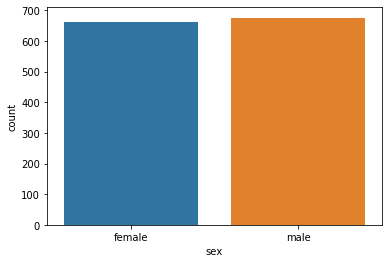

In [309]:
#3.h.Distribution of categorical columns (include children)
#categorical columns are ''sex'  'smoker' ,'region'
#Distribution of 'sex'
sns.countplot(insurance_data['sex'])

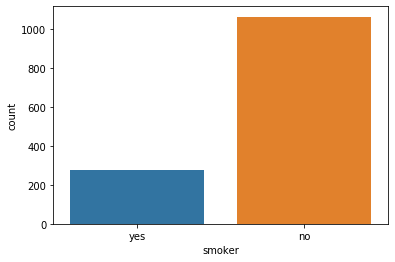

In [310]:
#3.h.Distribution of categorical columns (include children)
#categorical columns are ''sex'  'smoker' ,'region'
#Distribution of 'smoker'
sns.countplot(insurance_data['smoker'])

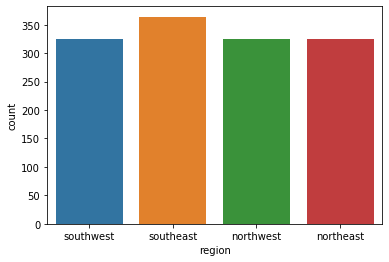

In [311]:
#3.h.Distribution of categorical columns (include children)
#categorical columns are ''sex'  'smoker' ,'region'
#Distribution of 'region'
sns.countplot(insurance_data['region'])

Unique valules for children [0 1 3 2 5 4]


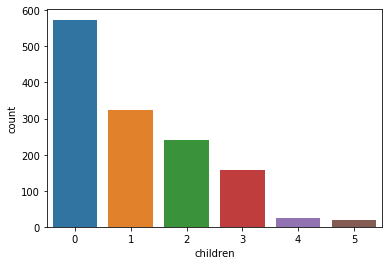

In [312]:
#3.h.Distribution of categorical columns (include children)
#categorical columns are ''sex'  'smoker' ,'region'
#Distribution of 'children'
# unique value for children
print('Unique valules for children {}'.format(insurance_data['children'].unique()))
sns.countplot(insurance_data['children'])

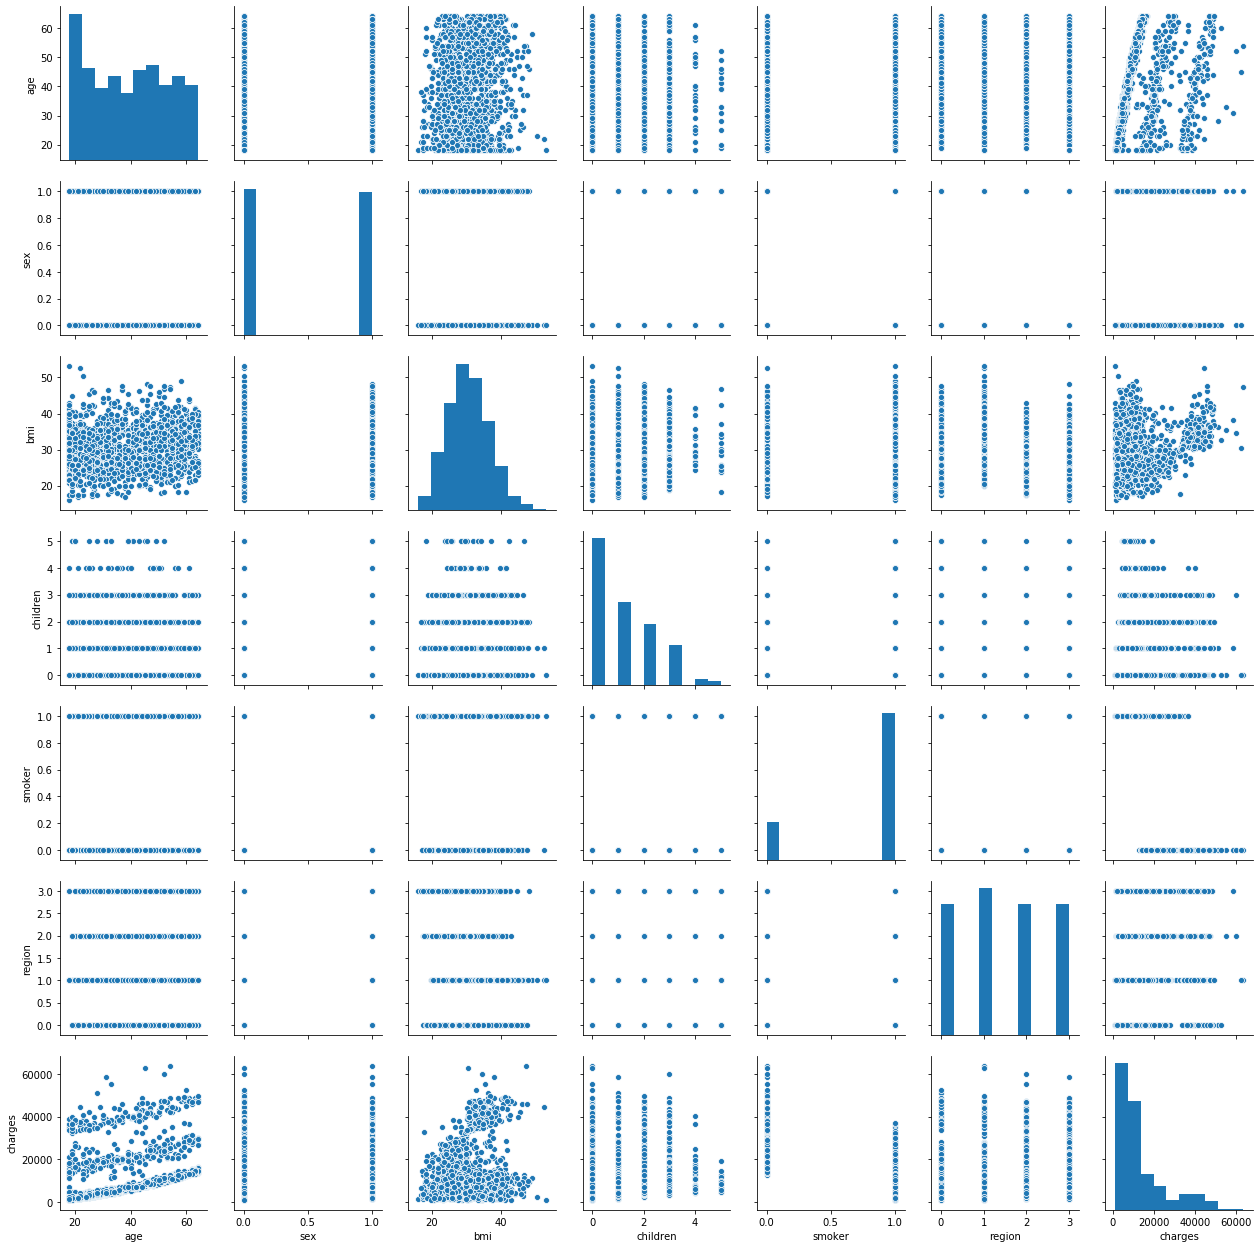

In [313]:
#3.i.Pair plot that includes all the columns of the data frame
#using replace
# convert categorical string data into values as pairplot ignores string values
#cData['origin'] = cData['origin'].replace({1:'america',2:'europe',3:'asia'})
insurance_data_copy = copy.deepcopy(insurance_data)
insurance_data_copy['sex'] = insurance_data_copy['sex'].replace({'male':0,'female':1})
insurance_data_copy['smoker'] = insurance_data_copy['smoker'].replace({'yes':0,'no':1})
insurance_data_copy['region'] = insurance_data_copy['region'].replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3})
#print(insurance_data['region'].head())
sns.pairplot(insurance_data_copy)

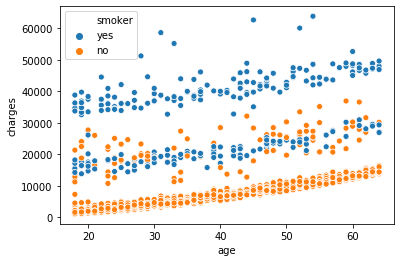

In [314]:
#4.a.Do charges of people who smoke differ significantly from the people who don't?
#From Visualization
sns.scatterplot(x= insurance_data['age'],y=insurance_data['charges'],hue=insurance_data['smoker'])
#Smokers having more chages than Non smokers so 'charges of people who smoke differ significantly from the people who don't'

In [317]:
#Using test statistics
#Alternative Hypothesis Ha
Ha='Charges differ for smokers and non smokers'
#Null Hypothesis Ho: 
Ho='Charges are same for smokers and non smokers'
#With Alpha confidence level of 0.05
alpha = 0.05
from scipy.stats import ttest_ind
t_statistic,p_value  = ttest_ind(insurance_data[insurance_data['smoker'] == 'yes']['charges'],insurance_data[insurance_data['smoker'] == 'no']['charges'])
print(p_value)
if(p_value < alpha):
    print('As p_value is less than alpha value,rejecting Null Hypothesis(Ho),Ha stands: {}'.format(Ha))
else:
    print('As p_value is more than alpha value,failed to reject Null Hypothesis(Ho),Ho stands: {}'.format(Ho))

8.271435842177219e-283
As p_value is less than alpha value,rejecting Null Hypothesis(Ho),Ha stands: Charges differ for smokers and non smokers


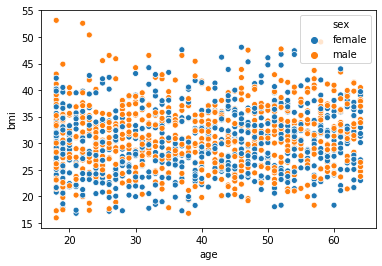

In [316]:
#4.b.Does bmi of males differ significantly from that of females?
#From Visualization
sns.scatterplot(x= insurance_data['age'],y=insurance_data['bmi'],hue=insurance_data['sex'])
#No relation between gender and bmi

In [239]:
#Using test statistics Does bmi of males differ significantly from that of females?
#Alternative Hypothesis Ha
Ha='bmi of males differ significantly from that of females'
#Null Hypothesis Ho: 
Ho='bmi of males are same of females'
#With Alpha confidence level of 0.05
alpha = 0.05
from scipy.stats import ttest_ind
t_statistic,p_value  = ttest_ind(insurance_data[insurance_data['sex'] == 'male']['bmi'],insurance_data[insurance_data['sex'] == 'female']['bmi'])
print(p_value)
if(p_value < alpha):
    print('As p_value is less than alpha value,rejecting Null Hypothesis(Ho),Ha stands: {}'.format(Ha))
else:
    print('As p_value is more than alpha value,failed to reject Null Hypothesis(Ho),Ho stands: {}'.format(Ho))

0.08997637178984932
As p_value is more than alpha value,failed to reject Null Hypothesis(Ho),Ho stands: bmi of males are same of females


In [318]:
#4.c.Is the proportion of smokers significantly different in different genders?
#From Data

#proportion of smoker in male
male_count  = insurance_data.sex.value_counts()[0]
male_smokers_count = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts()[1]
female_count  = insurance_data.sex.value_counts()[1]
female_smokers_count = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts()[1]
print('male in data: {}'.format(male_count))
print('male smokers in data: {}'.format(male_smokers_count))
print('female in data: {}'.format(female_count))
print('female smokers in data: {}'.format(female_smokers_count))


male in data: 676
male smokers in data: 159
female in data: 662
female smokers in data: 115


In [319]:
#4.c.Is the proportion of smokers significantly different in different genders?
#Using statistics
from statsmodels.stats.proportion import proportions_ztest
alpha = 0.05
Ha = 'proportion of smokers significantly different in different genders'
Ho = 'proportion of smokers is same in different genders'
stat,p_value = proportions_ztest([male_smokers_count,female_smokers_count],[male_count,female_count])

print(p_value)
if(p_value < alpha):
    print('As p_value is less than alpha value,rejecting Null Hypothesis(Ho),Ha stands: {}'.format(Ha))
else:
    print('As p_value is more than alpha value,failed to reject Null Hypothesis(Ho),Ho stands: {}'.format(Ho))


0.005324114164320532
As p_value is less than alpha value,rejecting Null Hypothesis(Ho),Ha stands: proportion of smokers significantly different in different genders


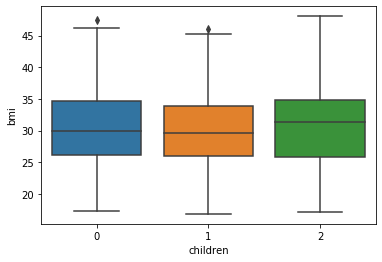

In [320]:
#4.d.Is the distribution of bmi across women with no children, one child and two children, the same?
#Chek using visualization
sns.boxplot('children','bmi',data= bmi_single_data)
#Box plot shows there is no diffrence of bmi across women with no children, one child and two children

In [321]:
#4.d.Is the distribution of bmi across women with no children, one child and two children, the same?
#set null and alternative hypothesis
# get data for only female
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
alpha = 0.05
Ho = 'The distribution of bmi across women with no children, one child and two children is same'
Ha = 'The distribution of bmi across women with no children, one child and two children differs'

female_data = insurance_data[insurance_data['sex'] == 'female']
bmi_single_data = pd.DataFrame()
bmi_single_data = female_data[female_data['children']<=2]

mod = ols('bmi ~ children', data = bmi_single_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

#print(aov_table)
p_value = aov_table['PR(>F)']['children']
#print(p_value)

if(p_value < alpha):
    print('As p_value is less than alpha value,rejecting Null Hypothesis(Ho),Ha stands: {}'.format(Ha))
else:
    print('As p_value is more than alpha value,failed to reject Null Hypothesis(Ho),Ho stands: {}'.format(Ho))

As p_value is more than alpha value,failed to reject Null Hypothesis(Ho),Ho stands: The distribution of bmi across women with no children, one child and two children is same
